In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load data
df = pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## 1. Data Exploration (20 points):
(a) Plot the histogram of the Calories. Comment on the datatype of the features.
(b) Plot the correlation heatmap between features and Calories
(c) List the features which have the second and third largest positive correlation with Calories. Note: if
you encounter multiple features actually mean the same thing, only list the feature with the largest
correlation. For instance, if you see Sodium and Sodium (%Daily Value) and the former has larger
correlation with Calories, list Sodium only.

(d) Report all features which have negative correlation with Calories. Does your result meet your expectation?


Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


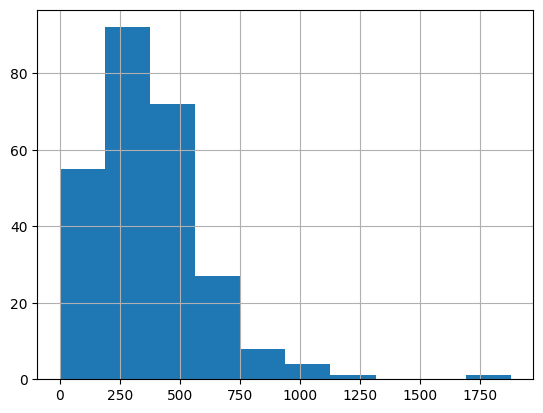

In [17]:
Calories =df['Calories']
Calories.hist()

print(df.dtypes)

## Observation Obs
The first 3 featurees a categorical nominal value. The "Size" column refer to the weighet of single serving item. The rest Columns are in int or float type. Continous numerical value.


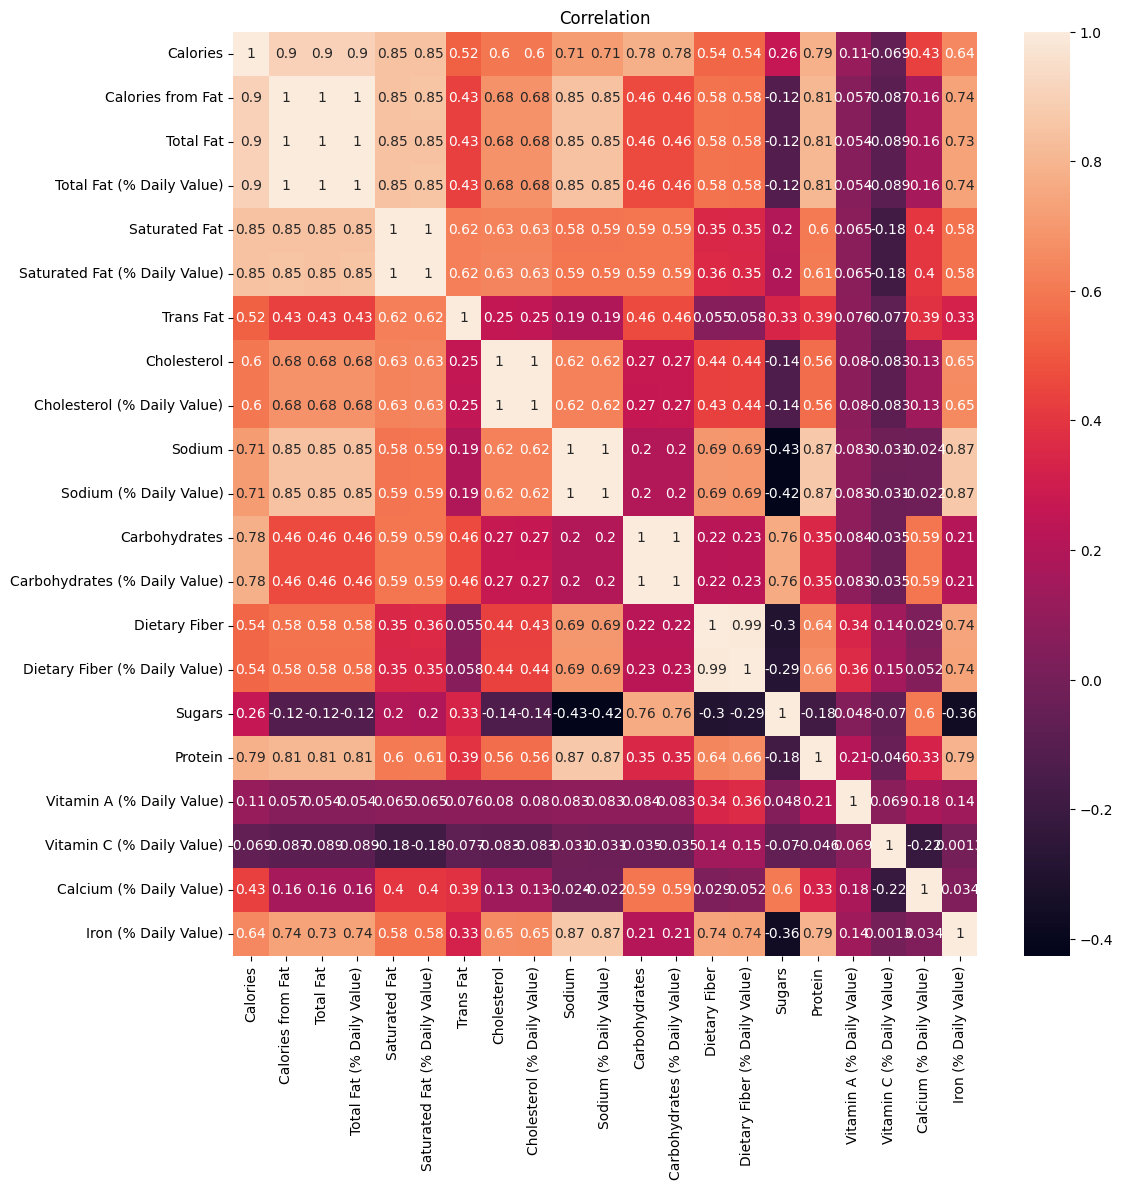

In [18]:
num_df = df.select_dtypes(include='number')
corre = num_df.corr()
plt.figure(figsize=(12, 12))
plt.title('Correlation')
sns.heatmap(corre, annot=True)
plt.show()

In [19]:
top2 = corre['Calories'].sort_values(ascending = False)
#top2 = top2.iloc[1:3]
top2

,Calories
Calories,1.000000
Calories from Fat,0.904588
Total Fat,0.904409
Total Fat (% Daily Value),0.904123
Saturated Fat (% Daily Value),0.847631
Saturated Fat,0.845564
Protein,0.787847
Carbohydrates,0.781539
Carbohydrates (% Daily Value),0.781242
Sodium (% Daily Value),0.713415


## OBS:

Since the top 2 factors is alternate way of descrbing calories(top2 = top2.iloc[1:3]). I would use my personal experience to identify the top2 correlated features, which are saturated fat and protein. The saturated servings and high protein food usually implies high carlories. Which intuitively true since saturated involves a lot of oil and high protein food usually can provide a lot of calories.

The only negative correlation is Vc, which is usually come from vegetable and fruit, and science do classify these food as healthy and low calories nutrition sources. Particularlly, some high Vc food is low calories. Thats why Vc can be negative correlated



## 2. Plotting (20 points):
(a) Plot the scatter plot for ‘features vs. Calories’ for all features found in 1(c) and 1(d).
(b) Plot the box plot for all features found in 1(c) and 1(d) correspondingly.

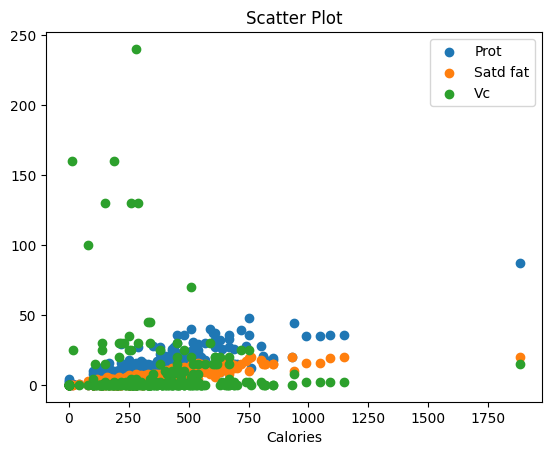

In [20]:
carloriesDf = pd.DataFrame({'Calories':df['Calories'], "protein ":df["Protein"],"saturated" : df['Saturated Fat'],"Vc" : df['Vitamin C (% Daily Value)']})

plt.scatter(df['Calories'], df["Protein"], label='Prot')
plt.scatter(df['Calories'], df['Saturated Fat'], label='Satd fat')
plt.scatter(df['Calories'], df['Vitamin C (% Daily Value)'], label='Vc')

plt.xlabel('Calories')
plt.title('Scatter Plot')
plt.legend()
plt.show()


,0
Calories,"Axes(0.125,0.11;0.168478x0.77)"
protein,"Axes(0.327174,0.11;0.168478x0.77)"
saturated,"Axes(0.529348,0.11;0.168478x0.77)"
Vc,"Axes(0.731522,0.11;0.168478x0.77)"


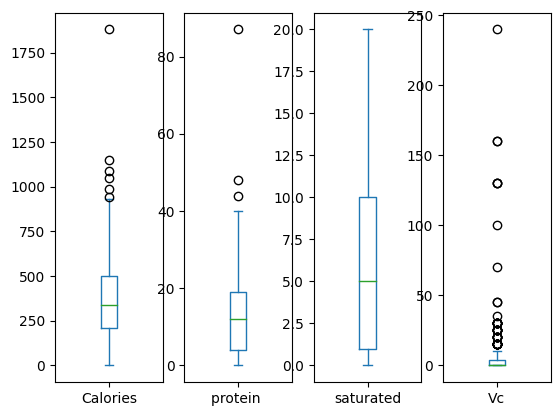

In [21]:
carloriesDf.plot(kind='box', subplots=True)


## Obs:
Vc servings provide small amount of calories but can offer abundent of vitamin C. Protein and Vc servings has many outliers. Quartiles shrinked compare to saturated servings.

3. Data Pre-processing: missing values (20 points):
(a) Report the median and standard deviation for all numerical features.
(b) Write the code to replace outliers of all numerical features in (a) with NaN. (Hint: Use the 3 sigma
deviation to find outliers). Report the total number of NaNs corresponding to each feature.
(c) Write the code to replace the missing values ( NaN) with mean values. Report the median and standard
deviation. Compare your result with (a) and write one sentence to explain your discovery.

In [22]:
#num_df is the dataFrame defined at problem1, contains numeric values only

med = num_df.median()
std = num_df.std()

print("Median:\n", med)
print("-------------------------------------")
print("Standard Deviation\n", std)

Median:
 Calories                         340.0
Calories from Fat                100.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Trans Fat                          0.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Sugars                            17.5
Protein                           12.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
Calcium (% Daily Value)           20.0
Iron (% Daily Value)               4.0
dtype: float64
-------------------------------------
Standard Deviation
 Calories                         240.269886
Calories from Fat                127.875914
Total Fat  

In [23]:
#https://www.geeksforgeeks.org/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/
#https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

#replacee outliers with NAN
outliers = num_df

for col in num_df.columns:
    mean = num_df[col].mean()
    std = num_df[col].std()

    #mean - 3std < outliers < mean + 3std
    outliers[col] = num_df[col].apply(lambda x: x if (mean - 3*std <= x <= mean + 3*std) else np.nan)

nans= outliers.isna().sum() #count #of Nan value
nans

,0
Calories,3
Calories from Fat,3
Total Fat,3
Total Fat (% Daily Value),3
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,9
Cholesterol,4
Cholesterol (% Daily Value),4
Sodium,3


In [24]:
# https://www.geeksforgeeks.org/how-to-fill-nan-values-with-mean-in-pandas/

NaFill = outliers.fillna(outliers.mean()) #replace NaN with mean

new_medians = NaFill.median()
new_std_devs = NaFill.std()

print("NewMedian", new_medians)
print("NewStd", new_std_devs)


NewMedian Calories                         340.0
Calories from Fat                100.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Trans Fat                          0.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Sugars                            17.5
Protein                           12.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
Calcium (% Daily Value)           20.0
Iron (% Daily Value)               4.0
dtype: float64
NewStd Calories                         210.710032
Calories from Fat                107.986184
Total Fat                         11.989233
Total Fat (% Dail

## Obs
Focus on Calories: The median outlier may have the same number of high and low values, or the median area may have several values of 340, so the median is still the same after the drop. The std has significant modification from 240.269 to 210.710 decreased about 12%. eliminate outliers can signficantly improve the reliability of a data.

Features std who did not change may due to original data doesnt have outliers, or outliers's value is not very high(outlier >> 3std) Similar idea apply to rest features.

## 4. Linear Regression (20 points):
Note: Please use the original dataset for this question.
(a) Train a predictor to predict the Calories as follows:

Calories = θ0 + θ1 × [ Carbohydrates ] + θ2 × [ Protein ] + θ3 × [ Total Fat ]

Report the values of θ0, θ1, θ2 and θ3. Briefly describe your interpretation of these values, i.e., what do
θ0, θ1, θ2 and θ3 represent? Explain these in terms of the features and labels.

(b) Train another predictor to predict the Calories as follows:
Calories = θ0 + θ1 × [ Total Fat ]

Report the values of θ0 and θ1. Note that the coefficient here might be different than the one from (a) though they refer to the same feature. Provide an explanation as to why these coefficients might vary significantly.

(c) Split the data into two fractions – the first 90% for training, and the remaining 10% testing (based on the order they appear in the file). Train the model using all the features available in the training set only. What is the model’s MSE on the training and on the test set? Did it perform too well on the training set than the test set? If yes, what could be the reason?  

In [25]:
#https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/
from sklearn.linear_model import LinearRegression

X = NaFill[['Carbohydrates', 'Protein', 'Total Fat']]
y = NaFill['Calories']

model = LinearRegression()
model.fit(X, y)

#https://stackoverflow.com/questions/59740434/how-to-print-intercept-and-slope-of-a-simple-linear-regression-in-python-with-sc
b = model.intercept_
w1, w2, w3 = model.coef_

print('Carbohydrates ', 'Protein ', 'Total Fat ',"to Calories linear regression model")
print("General form: b + w1x1 + w2x2 + w3x3 = y")
print('In this case: Calories = θ0 + θ1 × [ Carbohydrates ] + θ2 × [ Protein ] + θ3 × [ Total Fat ]')
print("")
print("intercept θ0: ", b)
print("Carbohydrates θ1: ", w1)
print("Protein weight θ2: ", w2)
print("Total fat weight θ3: ", w3)



Carbohydrates  Protein  Total Fat  to Calories linear regression model
General form: b + w1x1 + w2x2 + w3x3 = y
In this case: Calories = θ0 + θ1 × [ Carbohydrates ] + θ2 × [ Protein ] + θ3 × [ Total Fat ]

intercept θ0:  24.667408497207134
Carbohydrates θ1:  3.343922671290473
Protein weight θ2:  4.23810633718889
Total fat weight θ3:  9.303099431615147


## Obs:
each servings have at least 24.6 calories. Total fat feature has the most weight(very influencial) to the amount of a serving' calories

In [26]:
singleFeature = NaFill[['Total Fat']]

model2 = LinearRegression()
model2.fit(singleFeature, y)

singleb = model2.intercept_
singlew = model2.coef_


print('Carbohydrates ', 'Protein ', 'Total Fat ',"to Calories linear regression model")
print("General form: b + w1x1 = y")
print('In this case: Calories = θ0 + θ1 × [ Total Fat ]')
print("")
print("intercept θ0: ", singleb)
print("Total fat weight θ1: ", singlew)

Carbohydrates  Protein  Total Fat  to Calories linear regression model
General form: b + w1x1 = y
In this case: Calories = θ0 + θ1 × [ Total Fat ]

intercept θ0:  159.27885100524307
Total fat weight θ1:  [14.71135673]


## Obs:
Predicts the calories only use Total Fat feature results this feature responsible for all the weight, the weight contribution from other features are added to this total Fat feature. Therefore, its weight value would increase.(keep only 1 feature doesnt always mean its weight would increase)

In [27]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_squared_error.html\

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_all = NaFill.drop(columns=['Calories'])
y = NaFill['Calories']

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.1, shuffle=False) #since keep the appeared order, shuffle = False, do not random generate datapoints


model3 = LinearRegression()
model3.fit(X_train, y_train)
trainPred = model3.predict(X_train)
mseTrain = mean_squared_error(y_train, trainPred)


testPred = model3.predict(X_test)
mseTest = mean_squared_error(y_test, testPred)

print("MSE on training set: ", mseTrain)
print("MSE on test set: ", mseTest)

MSE on training set:  2896.4535403981095
MSE on test set:  23961.498188103804


## Obs:
Splits the data into 90% training and 10% testing without shuffle these sets usually can result High Mean squared error(MSE) in the test set.

Since the model is trained with certain pattern of datapoint, can not have a good performence on the data that he never see before.​ (In this case our model trained with the servings' datapoint from quartile 0% to 90%, the top10% quartile serving's info did not apply to our model). I can not judge if the model is over trained in the training set, since the training sample can not greatly help the model to generalize its weights.

I have implemented model4 below with shuffled datapoints. The train mse is at4314. while current model has 2896. It could be over trained on the test set.

In [28]:
# Extra analysis
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all, y, test_size=0.1, shuffle=True) #since keep the appeared order, shuffle = False, do not random generate datapoints

model4 = LinearRegression()
model4.fit(X_train2, y_train2)
trainPred2 = model4.predict(X_train2)
mseTrain2 = mean_squared_error(y_train2, trainPred2)


testPred2 = model4.predict(X_test2)
mseTest2 = mean_squared_error(y_test2, testPred2)

print("MSE on training set: ", mseTrain2)
print("MSE on test set: ", mseTest2)

MSE on training set:  4004.4988571892463
MSE on test set:  6065.755366779218


Yurui_Huang_CS235_Assignment1
10/13/2024
